In [1]:
import numpy as np                
import pandas as pd               
import matplotlib.pyplot as plt   
import seaborn as sns             
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
import itertools

pd.options.display.float_format = '{:.2f}'.format

import warnings                  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/salary-cvs/salary.csv")
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 32561
Number of features (columns) in the dataset are: 15
Number of duplicate entries in the dataset are: 24
Number missing values in the dataset are: 0


In [4]:
df.drop_duplicates(keep='first',inplace=True)
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')

Number of records (rows) in the dataset are: 32537
Number of features (columns) in the dataset are: 15
Number of duplicate entries in the dataset are: 0


In [5]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex
[' Male' ' Female']

native-country
[' United-States' ' Cuba' ' Jamaica' ' 

In [6]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('?', np.nan, inplace=True)
pd.isna(df).sum()[pd.isna(df).sum() > 0]

workclass         1836
occupation        1843
native-country     582
dtype: int64

In [7]:
df.workclass.fillna(value='UnknCl', inplace=True)
df.occupation.fillna(value='UnknOc', inplace=True)
df['native-country'].fillna(value='Unkn_ctry' , inplace=True)
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

In [8]:
df.replace({'workclass': {'State-gov': 'Govt.', 'Self-emp-not-inc': 'self_emp', 'Federal-gov': 'Govt.', 'Local-gov': 'Govt.', 'Self-emp-inc':'self_emp', 'Without-pay': 'UnknCl', 'Never-worked': 'UnknCl'}}, inplace=True)
df.replace({'marital-status': {'Married-civ-spouse': 'Married', 'Divorced': 'DASW', 'Married-spouse-absent': 'DASW', 'Separated': 'DASW', 'Married-AF-spouse':'Married', 'Widowed': 'DASW'}}, inplace=True)
df.replace({'occupation': {'Adm-clerical': 'Adminstration', 'Exec-managerial': 'Executive', 'Handlers-cleaners': 'Handlers', 'Prof-specialty': 'Profsiionals', 'Other-service' : 'UnknOc', 'Craft-repair' : 'Repairing', 'Farming-fishing' : 'Farming', 'Transport-moving':'Transportation', 'Machine-op-inspct': 'MachineOp', 'Protective-serv' : 'ProtectiveServ', 'Priv-house-serv': 'HouseServ'}}, inplace=True)
df.replace({'native-country': {'United-States': 'USA', 'South': 'SouthKorea', 'Puerto-Rico': 'PuertoRico', 'Dominican-Republic': 'DominicRep', 'Outlying-US(Guam-USVI-etc)':'OutlyingUSA', 'Trinadad&Tobago': 'Tri&Tob', 'Holand-Netherlands': 'Netherlands', 'Hong' : 'HongKong'}}, inplace=True)
df.replace({'race': {'Asian-Pac-Islander': 'APAC', 'Amer-Indian-Eskimo': 'NatAm'}}, inplace=True)
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


workclass
['Govt.' 'self_emp' 'Private' 'UnknCl']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status
['Never-married' 'Married' 'DASW']

occupation
['Adminstration' 'Executive' 'Handlers' 'Profsiionals' 'UnknOc' 'Sales'
 'Repairing' 'Transportation' 'Farming' 'MachineOp' 'Tech-support'
 'ProtectiveServ' 'Armed-Forces' 'HouseServ']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'APAC' 'NatAm' 'Other']

sex
['Male' 'Female']

native-country
['USA' 'Cuba' 'Jamaica' 'India' 'Unkn_ctry' 'Mexico' 'SouthKorea'
 'PuertoRico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines'
 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos'
 'Taiwan' 'Haiti' 'Portugal' 'DominicRep' 'El-Salvador' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru' 'OutlyingUSA' 'Scotl

In [9]:
df['native-country'].value_counts()

native-country
USA            29153
Mexico           639
Unkn_ctry        582
Philippines      198
Germany          137
Canada           121
PuertoRico       114
El-Salvador      106
India            100
Cuba              95
England           90
Jamaica           81
SouthKorea        80
China             75
Italy             73
DominicRep        70
Vietnam           67
Japan             62
Guatemala         62
Poland            60
Columbia          59
Taiwan            51
Haiti             44
Iran              43
Portugal          37
Nicaragua         34
Peru              31
France            29
Greece            29
Ecuador           28
Ireland           24
HongKong          20
Cambodia          19
Tri&Tob           19
Laos              18
Thailand          18
Yugoslavia        16
OutlyingUSA       14
Honduras          13
Hungary           13
Scotland          12
Netherlands        1
Name: count, dtype: int64

In [10]:
USA = df[df['native-country'] == 'USA']
NonUSA = df[df['native-country'] != 'USA']
print('USA', USA.shape)
print('NonUSA', NonUSA.shape)

USA (29153, 15)
NonUSA (3384, 15)


In [11]:
print(df.info())
print(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None
                  count unique      top   freq      mean       std      min  \
age           

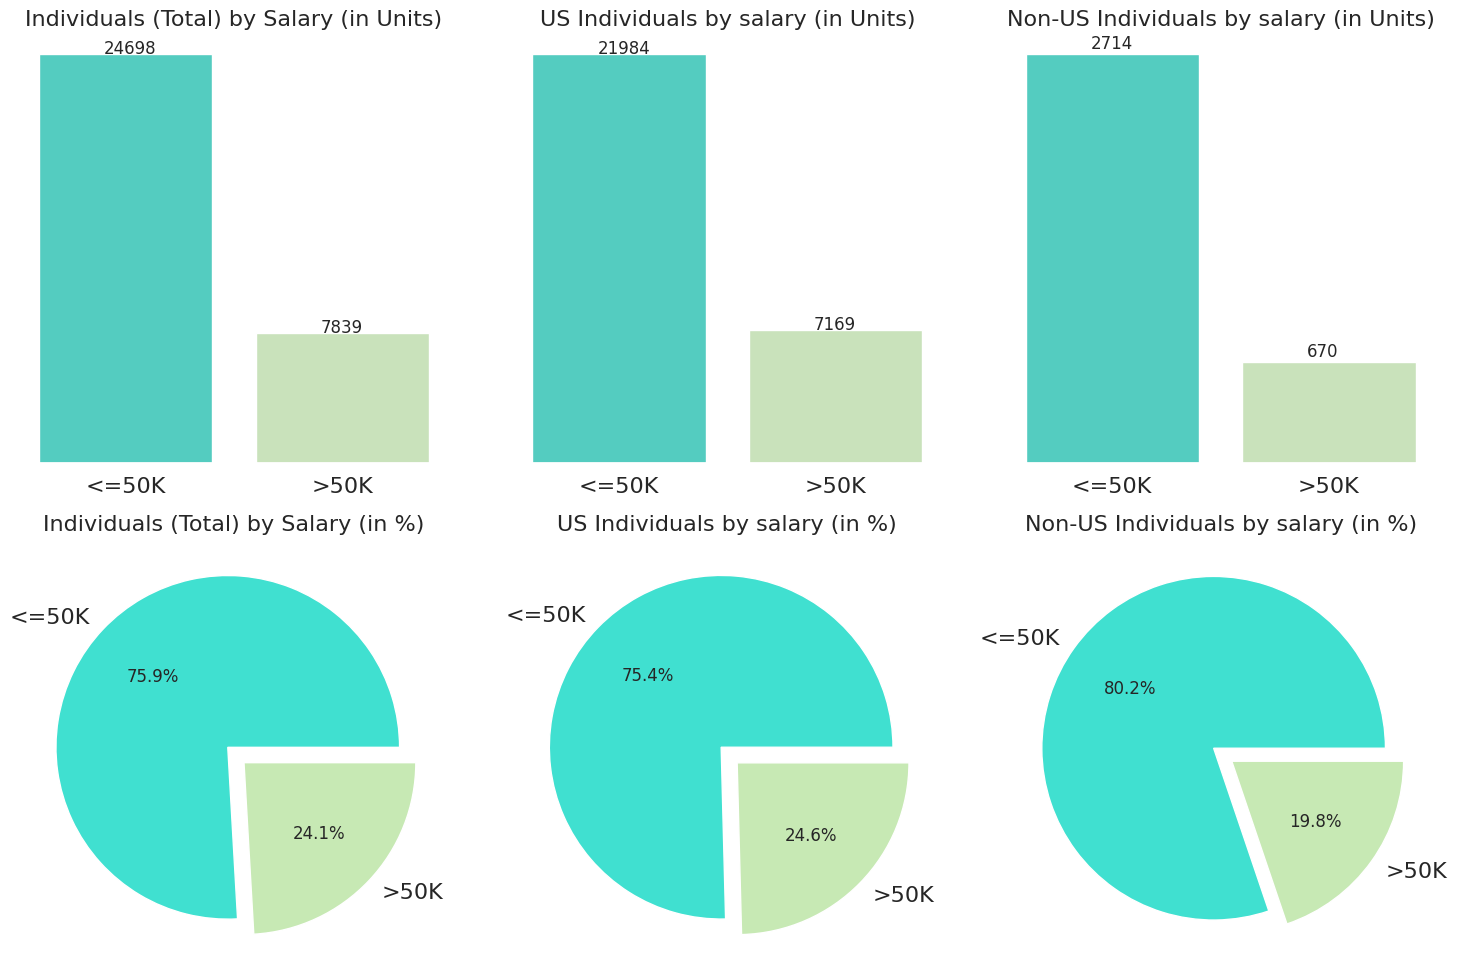

In [12]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':16,'ytick.labelsize':16, 'figure.autolayout':True})
my_pal = ('#40E0D0','#c7e9b4', '#EEE8AA', '#D2B48C', '#FAFAD2','#FAEBD7', '#D8BFD8','#F4A460','#F08080')
my_xpl = [0.05, 0.08]

plt.subplots(figsize=(15,15))

plt.subplot(3,3,1)
plt.title('Individuals (Total) by Salary (in Units)', fontsize=16)
ax = sns.countplot(x="salary", data=df, palette=my_pal, order=df['salary'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(3,3,2)
plt.title('US Individuals by salary (in Units)', fontsize=16)
ax = sns.countplot(x="salary", data=USA, palette=my_pal, order=df['salary'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))
plt.xlabel(None), plt.ylabel(None), plt.yticks([])

plt.subplot(3,3,3)
plt.title('Non-US Individuals by salary (in Units)', fontsize=16)
ax = sns.countplot(x="salary", data=NonUSA, palette=my_pal, order=df['salary'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))

plt.xlabel(None), plt.ylabel(None), plt.yticks([])

## Total Individuals by Salary (in %)
plt.subplot(3,3,4)
plt.title('Individuals (Total) by Salary (in %)', fontsize=16)
df['salary'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(3,3,5)
plt.title('US Individuals by salary (in %)', fontsize=16)
USA['salary'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(3,3,6)
plt.title('Non-US Individuals by salary (in %)', fontsize=16)
NonUSA['salary'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.show()

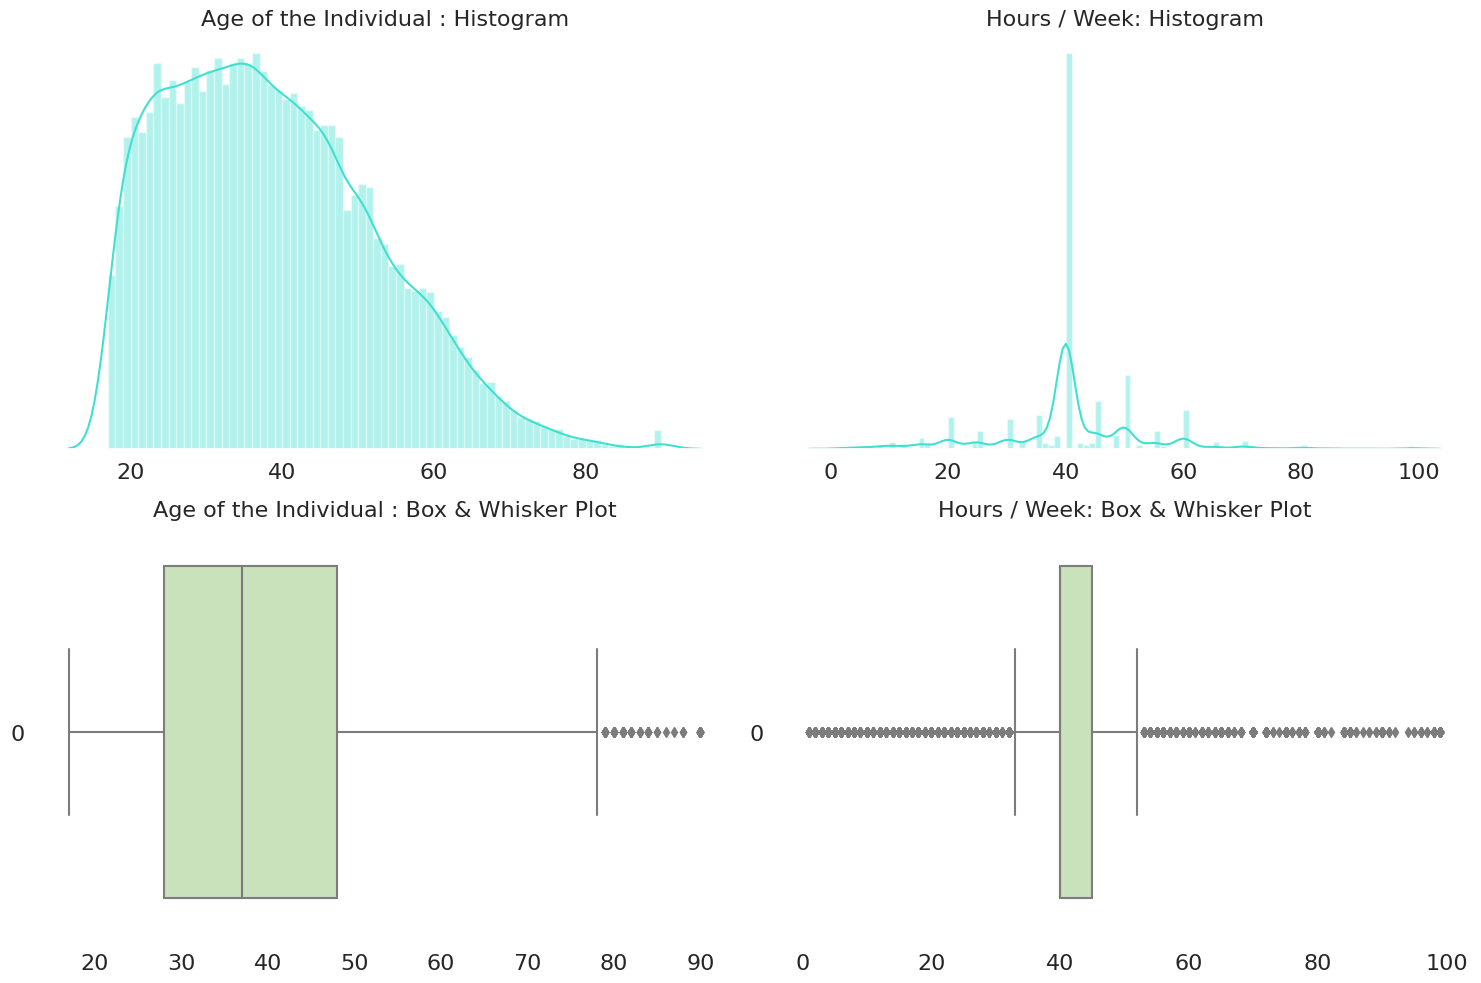

In [13]:
plt.subplots(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Age of the Individual : Histogram',fontsize=16)
sns.distplot(df.age, color='#40E0D0', bins=73)
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(2,2,2)
plt.title('Hours / Week: Histogram', fontsize=16)
sns.distplot(df['hours-per-week'], color='#40E0D0', bins=98)
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(2,2,3)
plt.title('Age of the Individual : Box & Whisker Plot', fontsize=16)
sns.boxplot(df['age'], orient='h',color="#c7e9b4")

plt.subplot(2,2,4)
plt.title('Hours / Week: Box & Whisker Plot', fontsize=16)
sns.boxplot(df['hours-per-week'], orient='h', color="#c7e9b4")

plt.show()

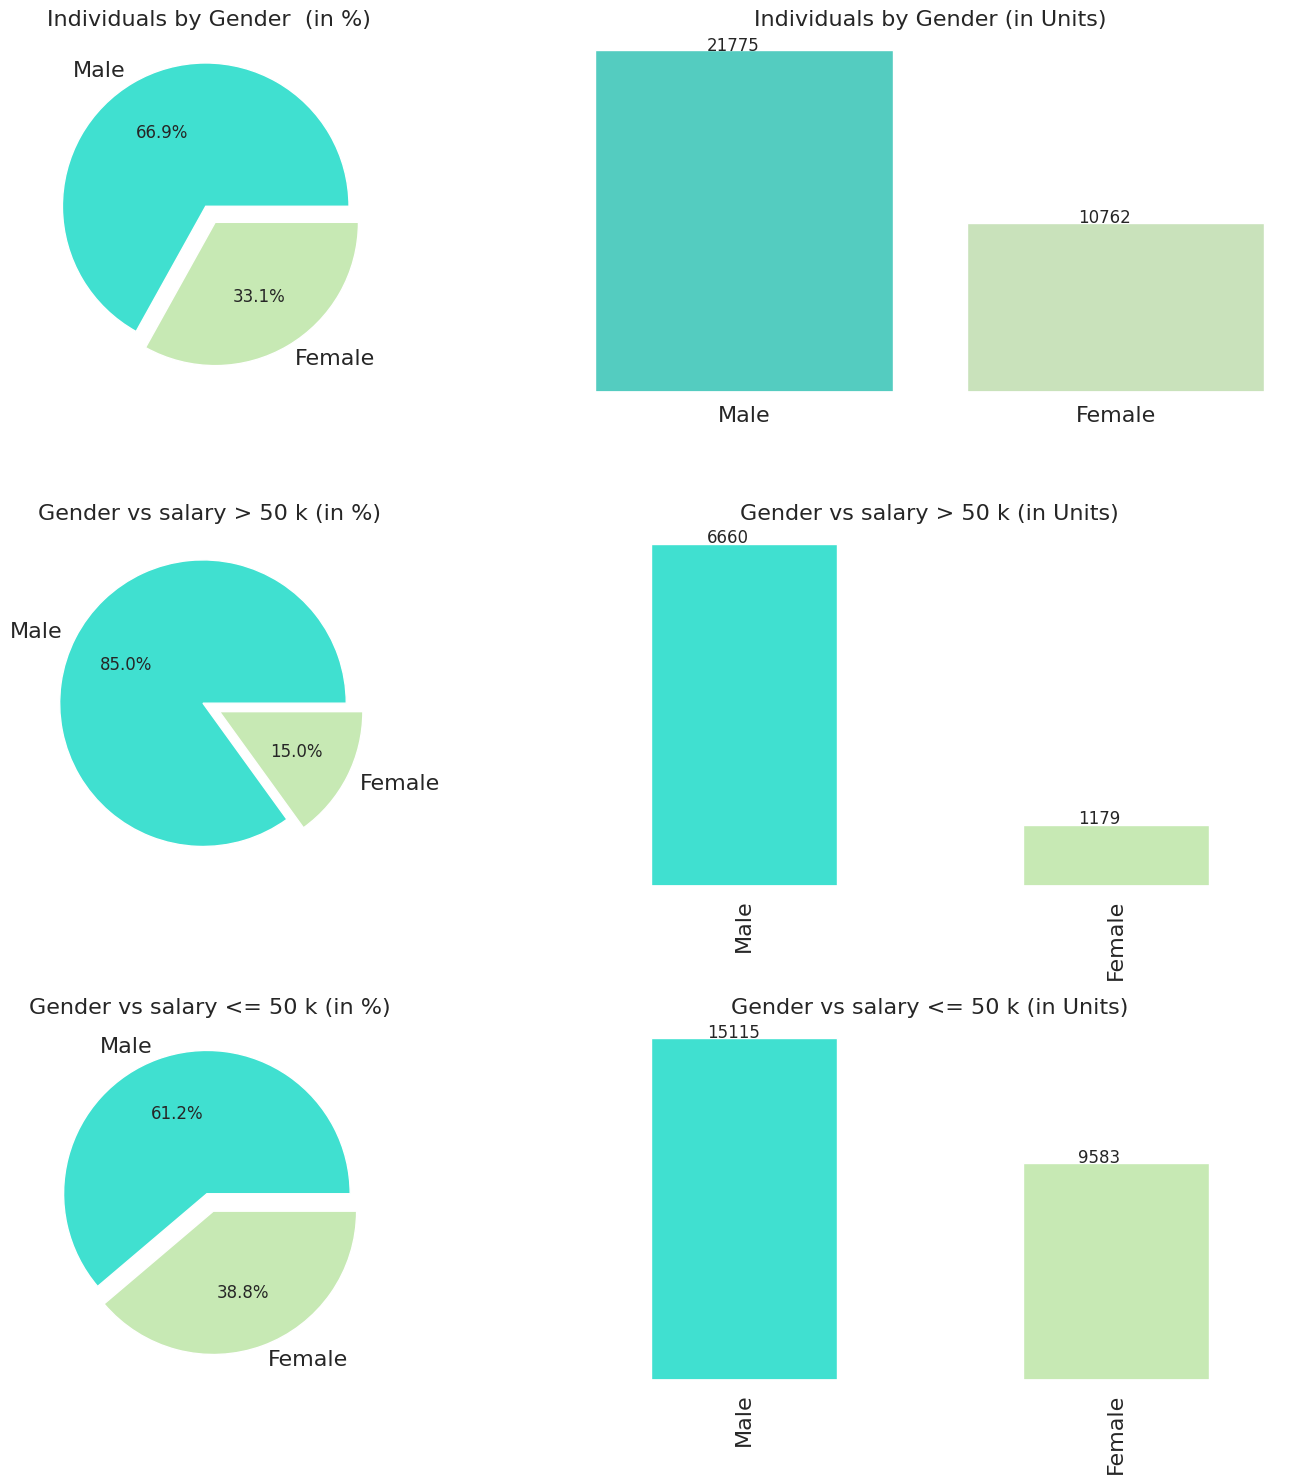

In [14]:
plt.subplots(figsize=(15,15))
my_xpl = [0.05, 0.08]

plt.subplot(3,2,1)
plt.title('Individuals by Gender  (in %)', fontsize=16)
df['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(3,2,2)
plt.title('Individuals by Gender (in Units)',fontsize=16)
ax = sns.countplot(x="sex", data=df, palette=my_pal, order=df['sex'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(3,2,3)
plt.title('Gender vs salary > 50 k (in %)', fontsize=16)
df[df['salary']=='>50K']['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(3,2,4)
plt.title('Gender vs salary > 50 k (in Units)', fontsize=16)
ax = df[df['salary']=='>50K']['sex'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(3,2,5)
plt.title('Gender vs salary <= 50 k (in %)', fontsize=16)
df[df['salary']=='<=50K']['sex'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(3,2,6)
plt.title('Gender vs salary <= 50 k (in Units)', fontsize=16)
ax = df[df['salary']=='<=50K']['sex'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.show()

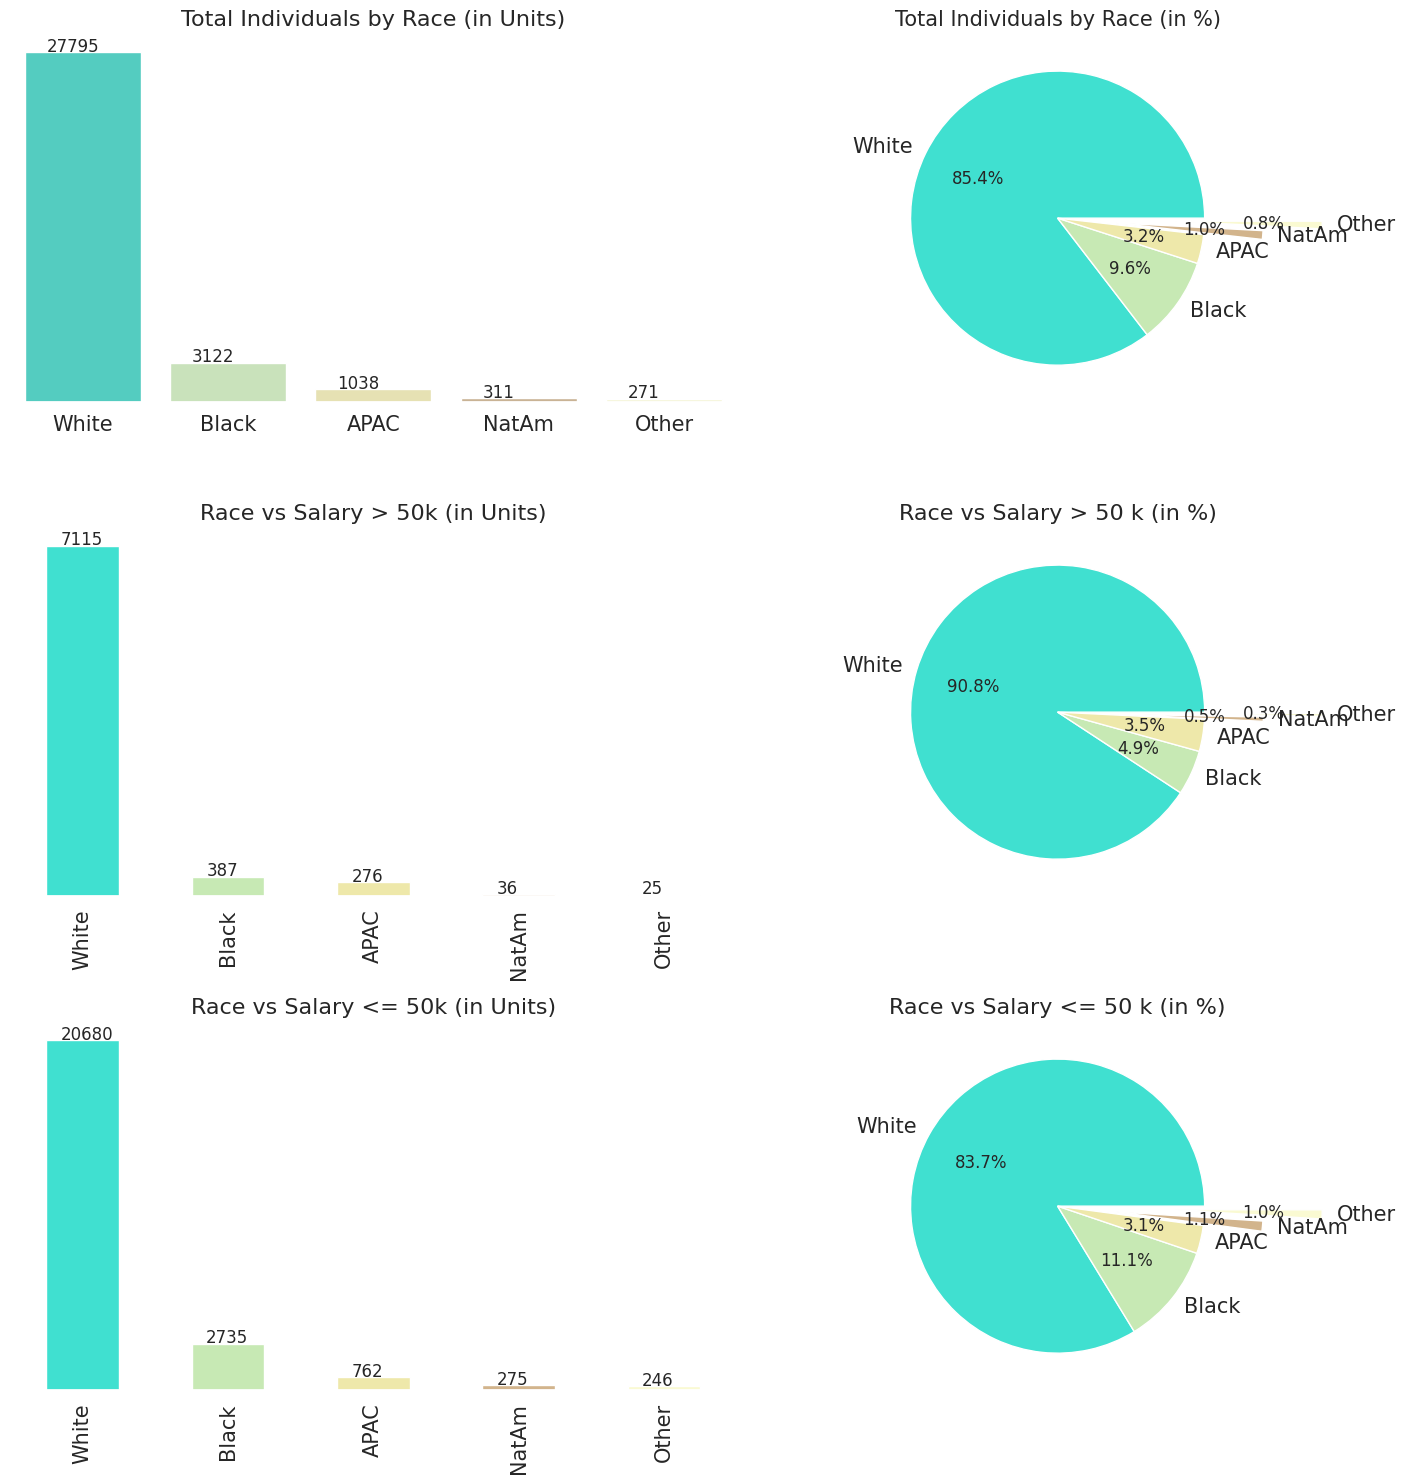

In [15]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':15,'ytick.labelsize':15, 'figure.autolayout':True})

plt.subplots(figsize=(15,15))
my_xpl = [0, 0, 0, 0.4, 0.8]

plt.subplot(3,2,1)
plt.title('Total Individuals by Race (in Units)', fontdict={'fontsize':16})
ax = sns.countplot(x="race", data=df, palette=my_pal, order=df['race'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+25))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(3,2,2)
plt.title('Total Individuals by Race (in %)', fontdict={'fontsize':15})
df['race'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', explode=my_xpl, autopct='%1.1f%%')
 
plt.subplot(3,2,3)
plt.title('Race vs Salary > 50k (in Units)', fontdict={'fontsize':16})
ax = df[df['salary']=='>50K']['race'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(3,2,4)
plt.title('Race vs Salary > 50 k (in %)', fontdict={'fontsize':16})
df[df['salary']=='>50K']['race'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', explode=my_xpl,  autopct='%1.1f%%')

plt.subplot(3,2,5)
plt.title('Race vs Salary <= 50k (in Units)', fontdict={'fontsize':16})
ax = df[df['salary']=='<=50K']['race'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(3,2,6)
plt.title('Race vs Salary <= 50 k (in %)', fontdict={'fontsize':16})
df[df['salary']=='<=50K']['race'].value_counts().plot(kind='pie', colors=my_pal, legend=None, ylabel='', explode=my_xpl, autopct='%1.1f%%')

plt.show()

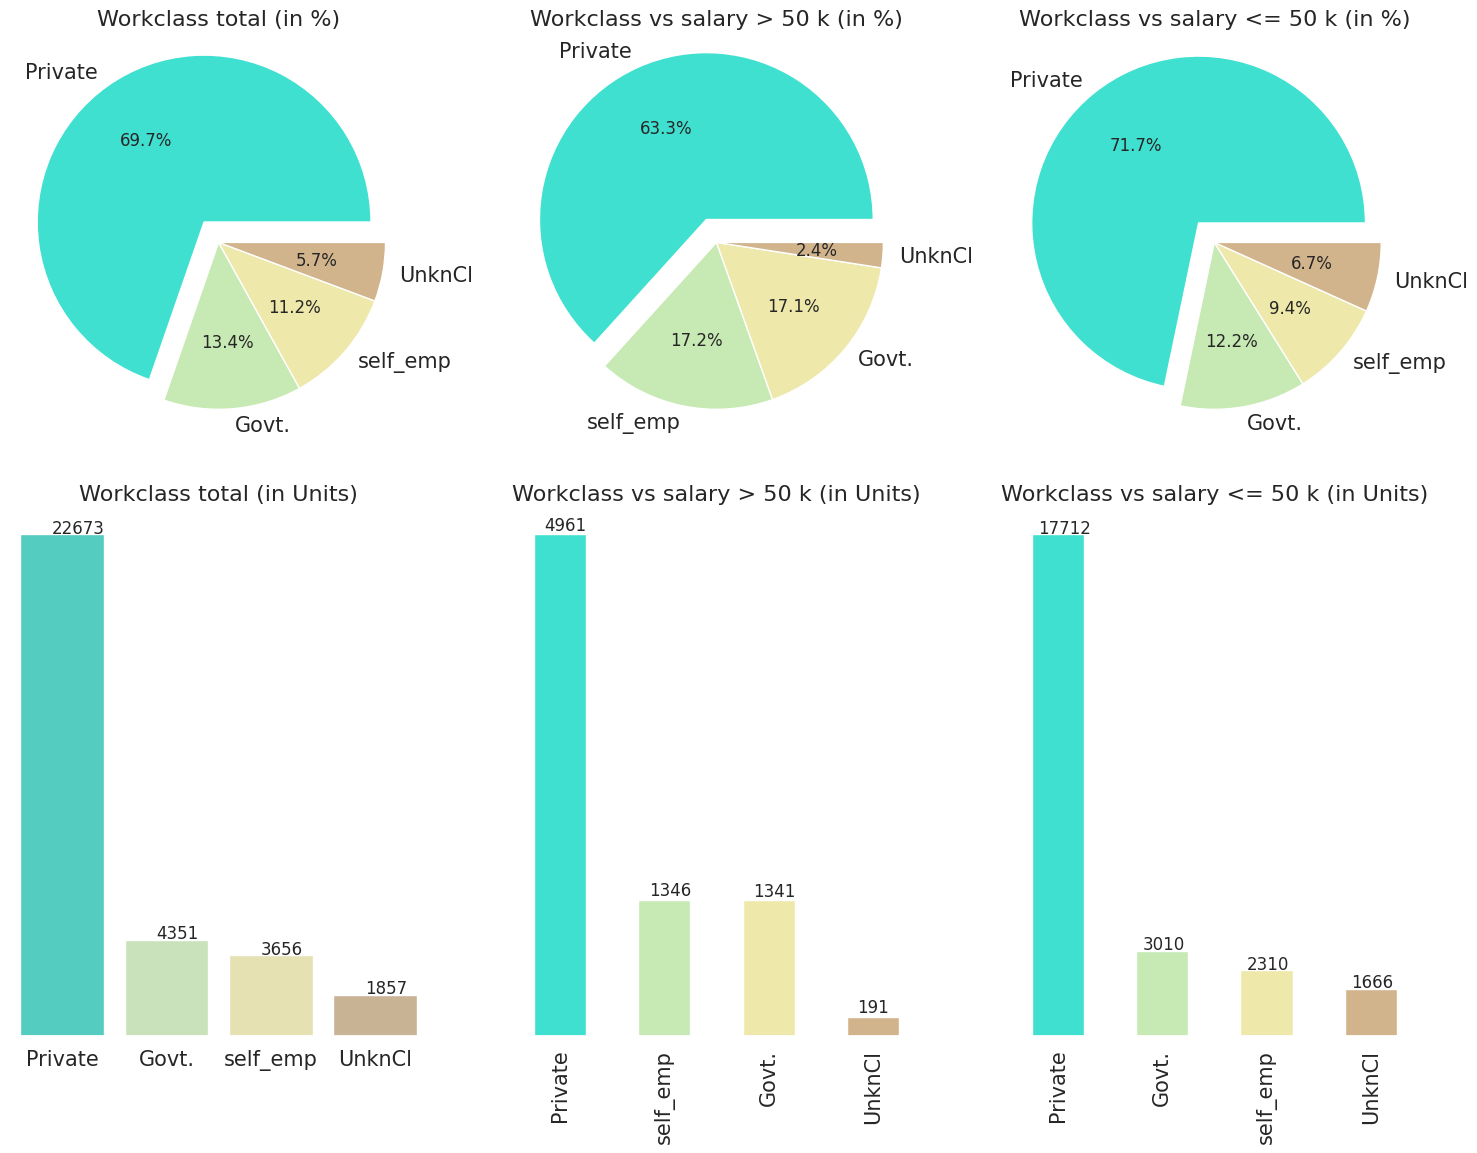

In [16]:

plt.subplots(figsize=(15,12))
my_xpl = [0.15, 0.0, 0.0, 0.0]

plt.subplot(2,3,1)
plt.title('Workclass total (in %)', fontsize=16)
df['workclass'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,2)
plt.title('Workclass vs salary > 50 k (in %)', fontsize=16)
df[df['salary']=='>50K']['workclass'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,3)
plt.title('Workclass vs salary <= 50 k (in %)', fontsize=16)
df[df['salary']=='<=50K']['workclass'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')


plt.subplot(2,3,4)
plt.title('Workclass total (in Units)',fontsize=16)
ax = sns.countplot(x="workclass", data=df, palette=my_pal, order=df['workclass'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(2,3,5)
plt.title('Workclass vs salary > 50 k (in Units)', fontsize=16)
ax = df[df['salary']=='>50K']['workclass'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+40))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(2,3,6)
plt.title('Workclass vs salary <= 50 k (in Units)', fontsize=16)
ax = df[df['salary']=='<=50K']['workclass'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+40))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.show()

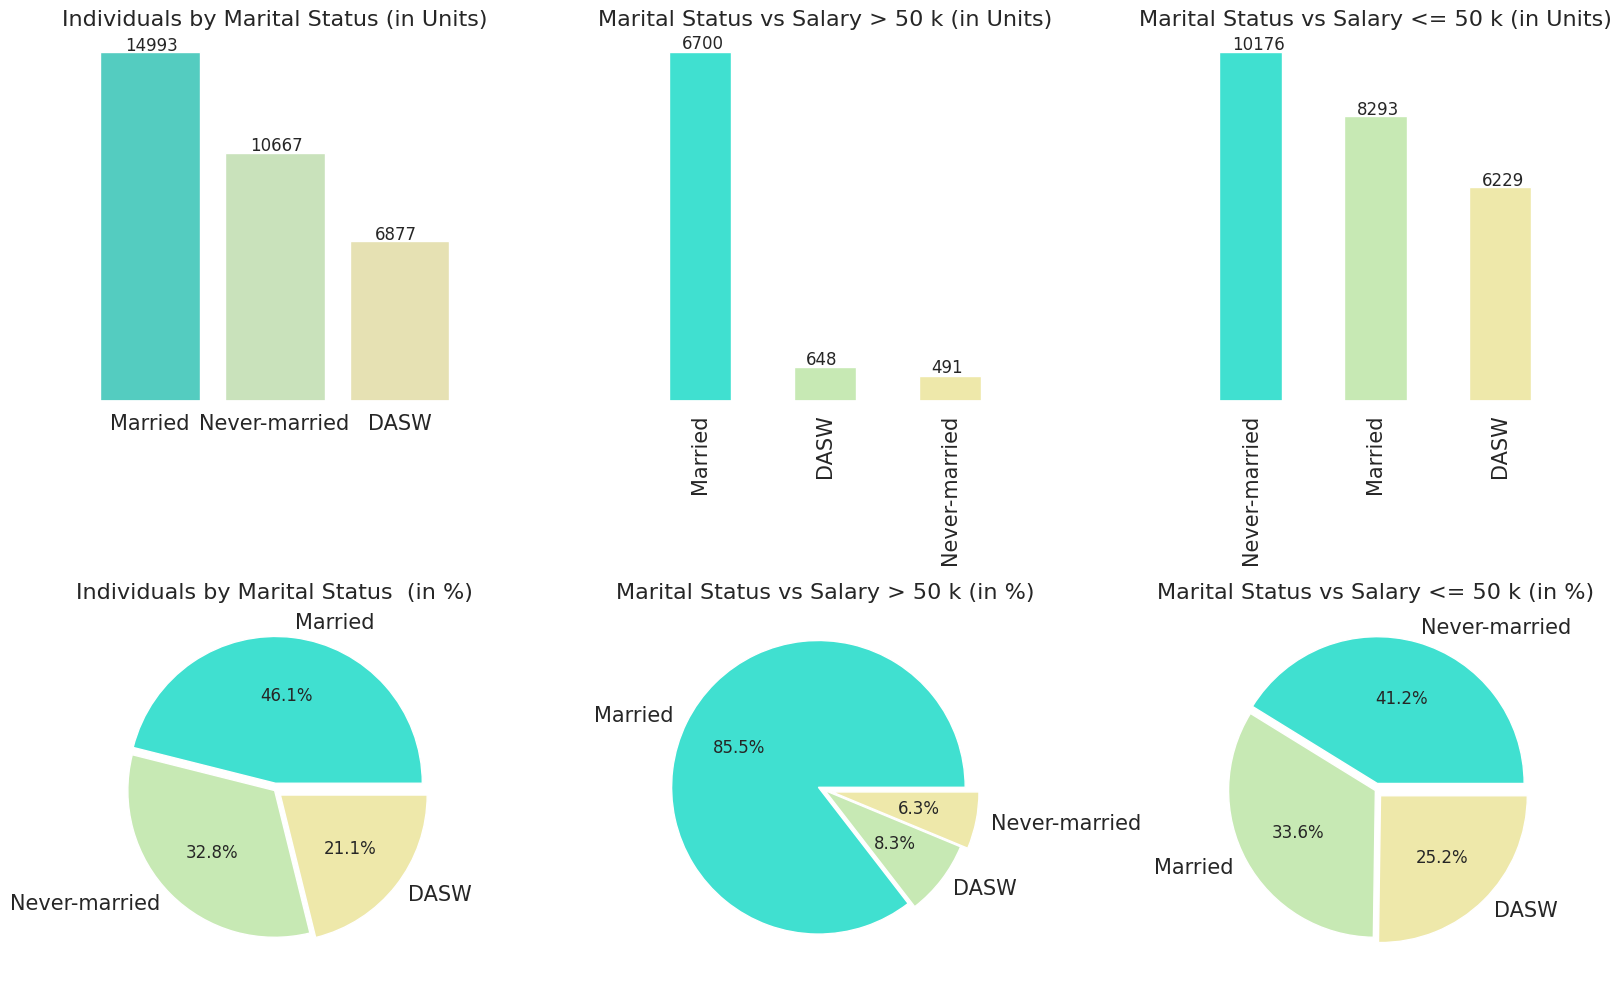

In [17]:
plt.subplots(figsize=(16,10))
my_xpl = [0.05, 0, 0.05]

plt.subplot(2,3,1)
plt.title('Individuals by Marital Status (in Units)', fontsize=16)
ax = sns.countplot(x="marital-status", data=df, palette=my_pal, order=df['marital-status'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(2,3,2)
plt.title('Marital Status vs Salary > 50 k (in Units)',fontsize=16)
ax = df[df['salary']=='>50K']['marital-status'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
    
plt.subplot(2,3,3)
plt.title('Marital Status vs Salary <= 50 k (in Units)', fontsize=16)
ax = df[df['salary']=='<=50K']['marital-status'].value_counts().plot(kind='bar', legend=None, color=my_pal)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.subplot(2,3,4)
plt.title('Individuals by Marital Status  (in %)', fontsize=16)
df['marital-status'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,5)
plt.title('Marital Status vs Salary > 50 k (in %)', fontsize=16)
df[df['salary']=='>50K']['marital-status'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.subplot(2,3,6)
plt.title('Marital Status vs Salary <= 50 k (in %)', fontsize=16)
df[df['salary']=='<=50K']['marital-status'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.show()

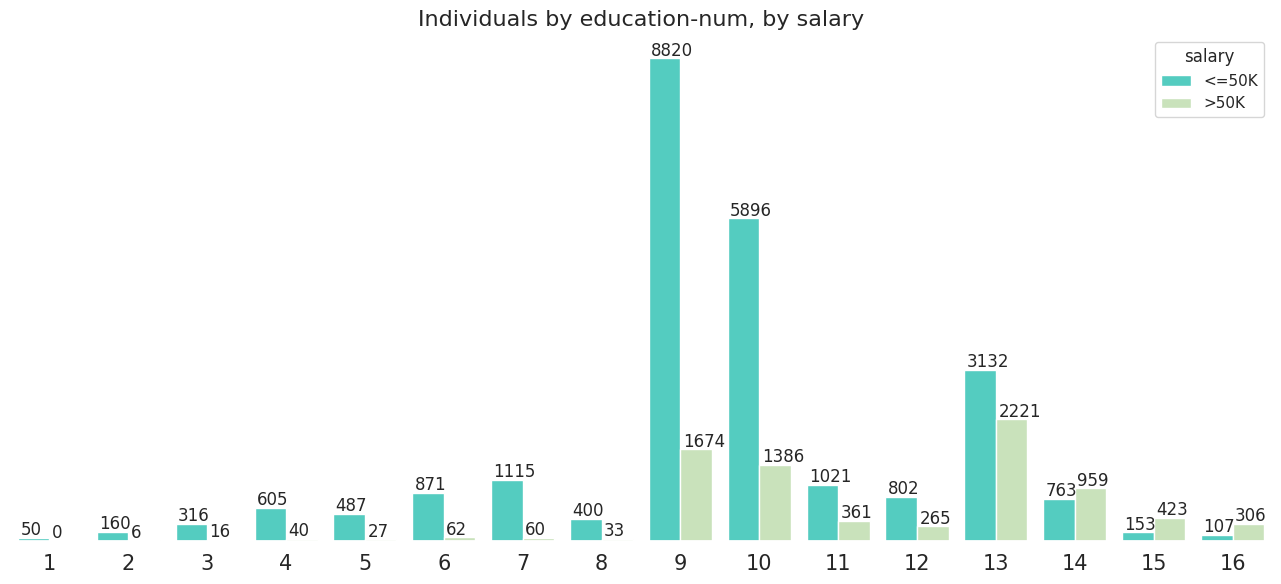

In [18]:
plt.figure(figsize=(13,6))

plt.title('Individuals by education-num, by salary', fontsize=16)
ax = sns.countplot(x='education-num', hue='salary', palette=my_pal, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.03, p.get_height()+50))

plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

plt.show()

In [19]:

num_df = df[['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']] 
cat_df = df[['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country', 'salary']]

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

main_df = pd.concat([num_df, cat_df], axis=1)
main_df.head(5)

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,39,77516,2174,0,40,0,9,12,2,0,1,4,1,38,0
1,50,83311,0,0,13,3,9,12,1,2,0,4,1,38,0
2,38,215646,0,0,40,1,11,8,0,4,1,4,1,38,0
3,53,234721,0,0,40,1,1,6,1,4,0,1,1,38,0
4,28,338409,0,0,40,1,9,12,1,7,5,1,0,4,0


In [21]:
main_df.skew(axis=0).sort_values(ascending=False)

capital-gain     11.95
capital-loss      4.59
fnlwgt            1.45
salary            1.21
workclass         1.12
relationship      0.79
age               0.56
hours-per-week    0.23
marital-status   -0.18
occupation       -0.27
education-num    -0.31
sex              -0.72
education        -0.93
race             -2.22
native-country   -4.16
dtype: float64

In [22]:


minmaxsca = MinMaxScaler() 
stdsca = StandardScaler() 

main_df['marital-status'] = stdsca.fit_transform(main_df[['marital-status']])
main_df['sex'] = stdsca.fit_transform(main_df[['sex']])
main_df['relationship'] = stdsca.fit_transform(main_df[['relationship']])
main_df['hours-per-week'] = stdsca.fit_transform(main_df[['hours-per-week']])
main_df['age'] = stdsca.fit_transform(main_df[['age']])
main_df['education'] = stdsca.fit_transform(main_df[['education']])
main_df['occupation'] = stdsca.fit_transform(main_df[['occupation']])
main_df['education-num'] = stdsca.fit_transform(main_df[['education-num']])

main_df['workclass'] = minmaxsca.fit_transform(main_df[['workclass']])
main_df['capital-gain'] = minmaxsca.fit_transform(main_df[['capital-gain']])
main_df['capital-loss'] = minmaxsca.fit_transform(main_df[['capital-loss']])
main_df['native-country'] = minmaxsca.fit_transform(main_df[['native-country']])
main_df['race'] = stdsca.fit_transform(main_df[['race']])

main_df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.03,77516,0.02,0.00,-0.04,0.00,-0.34,1.13,1.22,-1.66,-0.28,0.40,0.70,0.93,0
1,0.84,83311,0.00,0.00,-2.22,1.00,-0.34,1.13,-0.16,-1.20,-0.90,0.40,0.70,0.93,0
2,-0.04,215646,0.00,0.00,-0.04,0.33,0.18,-0.42,-1.54,-0.73,-0.28,0.40,0.70,0.93,0
3,1.06,234721,0.00,0.00,-0.04,0.33,-2.40,-1.20,-0.16,-0.73,-0.90,-2.31,0.70,0.93,0
4,-0.78,338409,0.00,0.00,-0.04,0.33,-0.34,1.13,-0.16,-0.04,2.21,-2.31,-1.42,0.10,0


In [23]:
corr_matrix = main_df.corr()
corr_matrix['salary'].sort_values(ascending=False)

salary            1.00
education-num     0.34
age               0.23
hours-per-week    0.23
capital-gain      0.22
sex               0.22
capital-loss      0.15
education         0.08
race              0.07
workclass         0.03
native-country    0.02
fnlwgt           -0.01
occupation       -0.10
marital-status   -0.11
relationship     -0.25
Name: salary, dtype: float64

In [24]:
X = main_df.drop(columns=["salary", "fnlwgt", "education", "race", "workclass", "native-country", "occupation", "marital-status"])
y = main_df["salary"]

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

print('-'*34, '\n', f'\033[94mTrain data & Test data shapes', '\n', f'\033[94m '*14, f'\033[94mX            y')
print('-'*34, '\n', f'\033[94mTrain data | ', X_train.shape, y_train.shape, '\n', f'\033[94mTest data  | ', X_test.shape, y_test.shape)

---------------------------------- 
 Train data & Test data shapes 
                X            y
---------------------------------- 
 Train data |  (26029, 7) (26029,) 
 Test data  |  (6508, 7) (6508,)


In [26]:
Model = [
    LogisticRegression(),
    XGBClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()] 

log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print(f'\033[94m-'*30, '\n')
    print(name)
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    #log = log.append(log_entry)
    
print(f'\033[94m-'*30)

------------------------------ 

LogisticRegression
Accuracy: 82.00676%
Log Loss: 0.39099
------------------------------ 

XGBClassifier
Accuracy: 85.98648%
Log Loss: 0.29189
------------------------------ 

KNeighborsClassifier
Accuracy: 82.49846%
Log Loss: 2.4218
------------------------------ 

SVC
Accuracy: 83.65089%
Log Loss: 0.37257
------------------------------ 

DecisionTreeClassifier
Accuracy: 82.75968%
Log Loss: 3.6891
------------------------------ 

RandomForestClassifier
Accuracy: 84.28089%
Log Loss: 0.64326
------------------------------ 

GaussianNB
Accuracy: 79.88629%
Log Loss: 0.89719
------------------------------


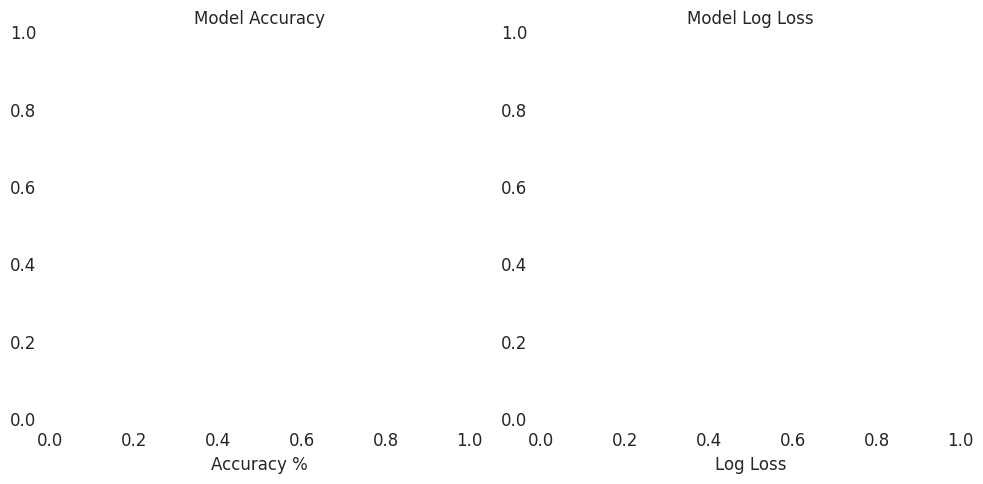

In [27]:
## Visualising the accuracy & log loss data

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
#sns.barplot(x='Accuracy', y='Model',data=log, color='#40E0D0')
plt.title('Model Accuracy', fontdict={'fontsize':12})
plt.ylabel(None), plt.xlabel('Accuracy %')

plt.subplot(1,2,2)
sns.set_color_codes("bright")
#sns.barplot(x='Log Loss', y='Model', data=log, color='#c7e9b4')
plt.title('Model Log Loss', fontdict={'fontsize':12})
plt.ylabel(None), plt.xlabel('Log Loss')

plt.show()

Accuracy: 85 % 

Confusion Matrix in Numbers
[[4626  314]
 [ 598  970]]


 Confusion Matrix in Percentage
[[0.94 0.06]
 [0.38 0.62]]



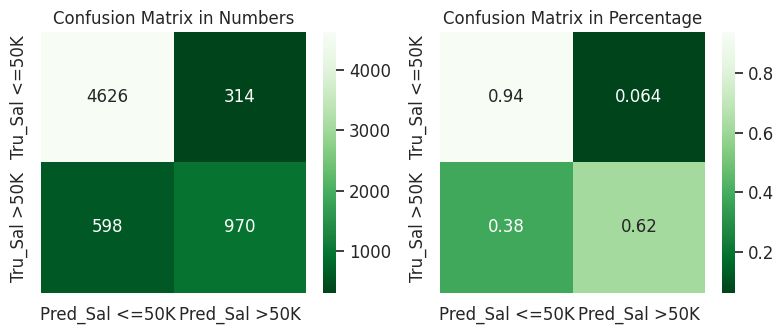

In [28]:
mod_XGB = XGBClassifier()
mod_XGB.fit(X_train, y_train)
y_pred_XGB = mod_XGB.predict(X_test)
acc_XGB = round(mod_XGB.score(X_test, y_test) * 100, 2)
print ("Accuracy: %i %% \n"%acc_XGB)

class_names = ['Salary <=50K', 'Salary >50K']

cnf_matrix = confusion_matrix(y_test, y_pred_XGB)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('\n', 'Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['Tru_Sal <=50K', 'Tru_Sal >50K']
predicted_class_names = ['Pred_Sal <=50K', 'Pred_Sal >50K']

main_df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

main_df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.subplots(figsize = (8,3.5))

plt.subplot(1,2,1)
plt.title("Confusion Matrix in Numbers", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix, cmap='Greens_r', annot=True, fmt='d')

plt.subplot(1,2,2)
plt.title("Confusion Matrix in Percentage", fontdict={'fontsize':12})
sns.heatmap(main_df_cnf_matrix_percent, cmap='Greens_r', annot=True)

plt.show()

In [29]:

print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4940
           1       0.76      0.62      0.68      1568

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.80      6508
weighted avg       0.85      0.86      0.85      6508



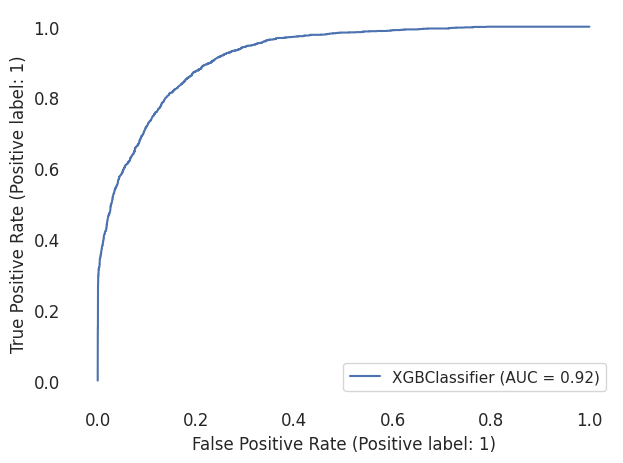

In [30]:

XGB_disp = RocCurveDisplay.from_estimator(mod_XGB, X_test, y_test)